In [36]:
from scipy.io import netcdf
import numpy as np
import matplotlib
import xarray as xr
import rioxarray as rxr
import matplotlib.pyplot as plt

In [56]:
data_path = "F:/EMRC_Project/T2_d03_2022-05-28-16Z.nc"
max_temp_xr  = xr.open_dataset(data_path)  
# View xarray object
max_temp_xr

<Figure size 432x288 with 0 Axes>

In [50]:
# For later - grab the crs of the data using rioxarray
climate_crs = max_temp_xr.rio.crs
climate_crs

In [44]:
y = max_temp_xr.XLAT #reading lattitudes
x = max_temp_xr.XLONG #reading longitude
#select variables at timestep
im_data = max_temp_xr.isel(Time=0)#.sel(isobaric=1000.)
im_data

<xarray.Dataset>
Dimensions:  (south_north: 336, west_east: 336)
Coordinates:
    XLAT     (south_north, west_east) float32 ...
    XLONG    (south_north, west_east) float32 ...
Dimensions without coordinates: south_north, west_east
Data variables:
    T2       (south_north, west_east) float32 ...
Attributes: (12/122)
    TITLE:                            OUTPUT FROM WRF V3.9.1 MODEL
    START_DATE:                      2021-04-26_00:00:00
    SIMULATION_START_DATE:           2021-04-26_00:00:00
    WEST-EAST_GRID_DIMENSION:        337
    SOUTH-NORTH_GRID_DIMENSION:      337
    BOTTOM-TOP_GRID_DIMENSION:       45
    ...                              ...
    ISOILWATER:                      14
    HYBRID_OPT:                      -1
    ETAC:                            0.0
    history:                         Fri May 27 14:58:37 2022: ncks -v T2,XLA...
    NCO:                             4.6.7
    history_of_appended_files:       Thu May 26 20:28:36 2022: Appended file ...

In [48]:
# View metadata
metadata = max_temp_xr.attrs
metadata

{'TITLE': ' OUTPUT FROM WRF V3.9.1 MODEL',
 'START_DATE': '2021-04-26_00:00:00',
 'SIMULATION_START_DATE': '2021-04-26_00:00:00',
 'WEST-EAST_GRID_DIMENSION': 337,
 'SOUTH-NORTH_GRID_DIMENSION': 337,
 'BOTTOM-TOP_GRID_DIMENSION': 45,
 'DX': 333.3333,
 'DY': 333.3333,
 'SKEBS_ON': 0,
 'SPEC_BDY_FINAL_MU': 1,
 'USE_Q_DIABATIC': 0,
 'GRIDTYPE': 'C',
 'DIFF_OPT': 1,
 'KM_OPT': 4,
 'DAMP_OPT': 3,
 'DAMPCOEF': 0.3,
 'KHDIF': 0.0,
 'KVDIF': 0.0,
 'MP_PHYSICS': 16,
 'RA_LW_PHYSICS': 4,
 'RA_SW_PHYSICS': 4,
 'SF_SFCLAY_PHYSICS': 2,
 'SF_SURFACE_PHYSICS': 2,
 'BL_PBL_PHYSICS': 5,
 'CU_PHYSICS': 0,
 'SF_LAKE_PHYSICS': 0,
 'SURFACE_INPUT_SOURCE': 1,
 'SST_UPDATE': 0,
 'GRID_FDDA': 0,
 'GFDDA_INTERVAL_M': 0,
 'GFDDA_END_H': 0,
 'GRID_SFDDA': 0,
 'SGFDDA_INTERVAL_M': 0,
 'SGFDDA_END_H': 0,
 'HYPSOMETRIC_OPT': 2,
 'USE_THETA_M': 0,
 'GWD_OPT': 0,
 'SF_URBAN_PHYSICS': 0,
 'SF_OCEAN_PHYSICS': 0,
 'SHCU_PHYSICS': 0,
 'MFSHCONV': 0,
 'FEEDBACK': 1,
 'SMOOTH_OPTION': 0,
 'SWRAD_SCAT': 1.0,
 'W_DAMPING': 1

NameError: name 'cfeature' is not defined

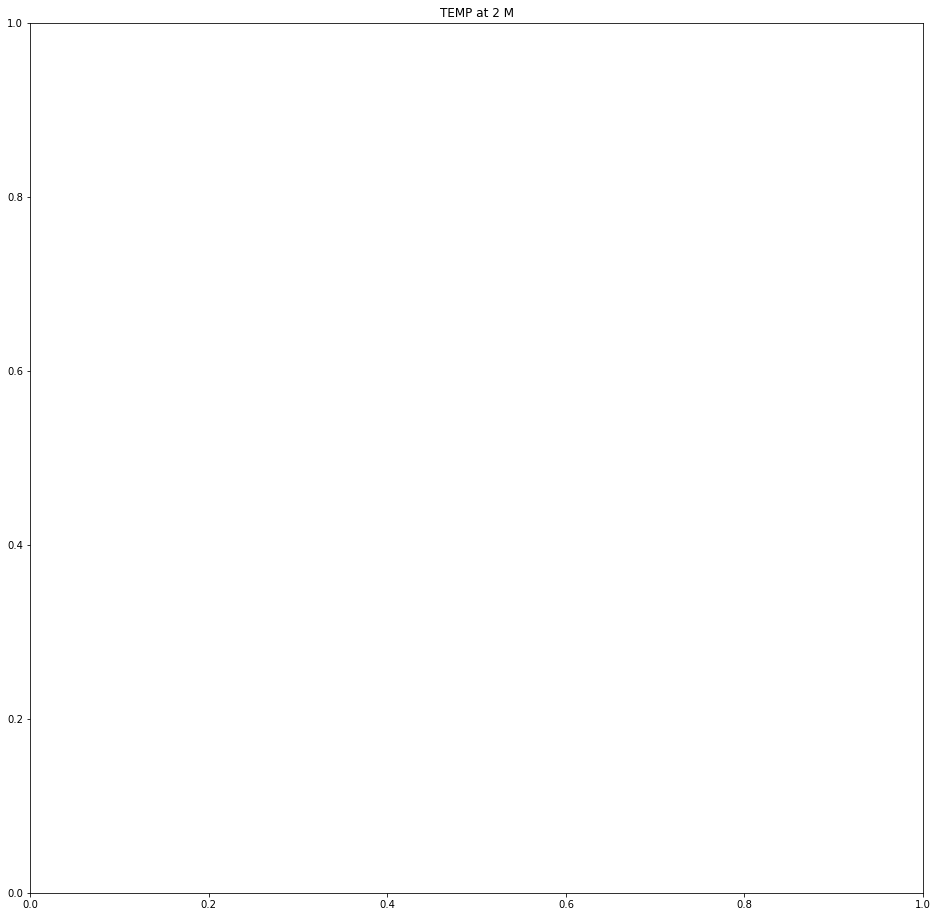

In [55]:
fig = plt.figure(figsize=(16, 16)) #open figure with size you need


# here where magic happen


plt.title('TEMP at 2 M', fontsize=12)


#these are additional features you can add to geo plots (like boders, rivers, lakes..etc)
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='blue')
ax.add_feature(states_provinces, edgecolor='blue')
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.COASTLINE)
#ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.LAKES, alpha=0.5)
#ax.add_feature(cfeature.RIVERS)


# adding colorbar and adjust the size
cbar = fig.colorbar(mp, shrink=0.3)
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False

plt.savefig("WRF_test.jpg",dpi=330)